### Student Information
Name:

Student ID:

GitHub ID:

Kaggle name:

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2020-Lab2-Master Repo](https://github.com/fhcalderon87/DM2020-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2020-hw2-nthu/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Dec. 5th 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM2020-Lab2-Homework](https://github.com/fhcalderon87/DM2020-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 8th 11:59 pm, Tuesday)__. 

In [1]:
### Begin Assignment Here

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

In [2]:
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer

from helpers import data_mining_helpers as dmh

train_df = pd.read_pickle('./data/train_df.pkl')
test_df = pd.read_pickle('./data/test_df.pkl')

train_df['unigrams'] = train_df['text'].apply(lambda x: dmh.tokenize_text(x, remove_stopwords=True, remove_punctuation=True))
test_df['unigrams'] = test_df['text'].apply(lambda x: dmh.tokenize_text(x, remove_stopwords=True, remove_punctuation=True))

count_vect = CountVectorizer(stop_words='english')
count_vect.fit(train_df.text)
train_counts = count_vect.transform(train_df.text)
test_counts = count_vect.transform(test_df.text)

In [3]:
train_word_count = pd.DataFrame(columns=count_vect.get_feature_names(), data=train_counts.toarray())
test_word_count = pd.DataFrame(columns=count_vect.get_feature_names(), data=test_counts.toarray())

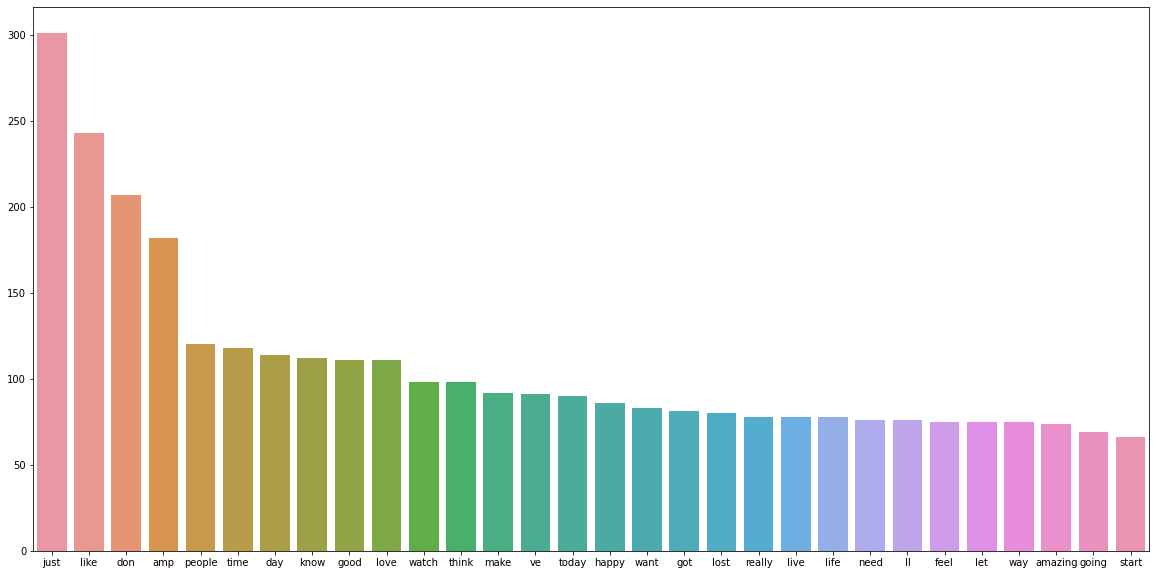

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

train_word_fequency = train_word_count.sum(axis=0).sort_values(ascending=False)[:30]
ax = sns.barplot(x=train_word_fequency.index, y=train_word_fequency)
ax.figure.set_size_inches(20,10)

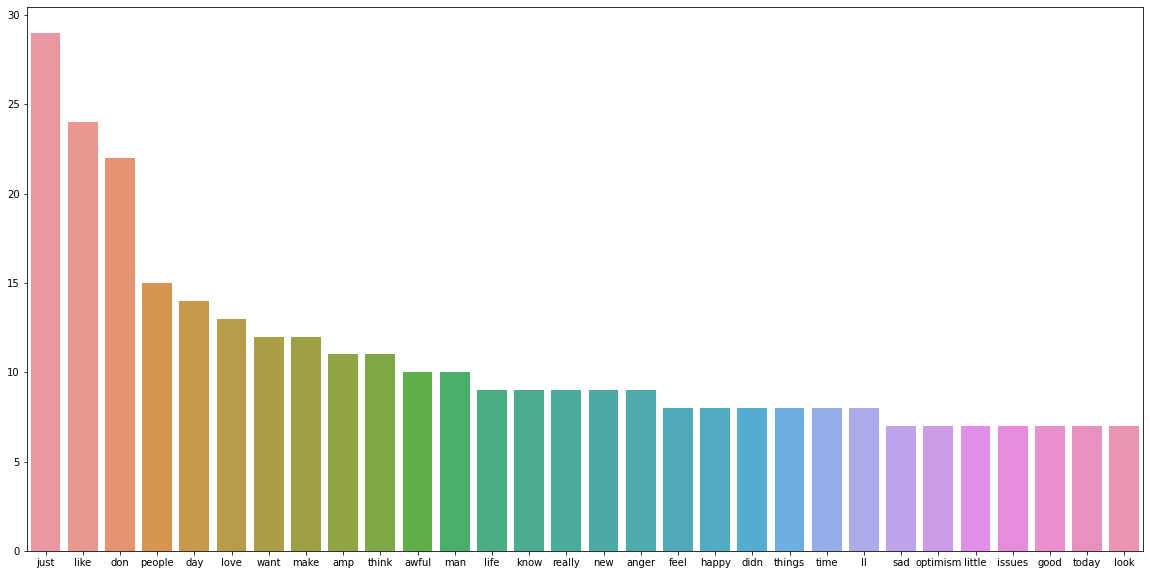

In [5]:
test_word_fequency = test_word_count.sum(axis=0).sort_values(ascending=False)[:30]
ax = sns.barplot(x=test_word_fequency.index, y=test_word_fequency)
ax.figure.set_size_inches(20,10)

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# build analyzers (td-idf)
TDIDF_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
TDIDF_1000.fit(train_df['text'])
TDIDF_1000.get_feature_names()[100:110]

/Users/manu/data_mining/venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


['awareness',
 'away',
 'awe',
 'awesome',
 'awful',
 'b',
 'baby',
 'back',
 'bad',
 'ball']

![confusion](pics/confusion.png)

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

Note: I believe the axis labels of the image above are inverted; usually the 'True label' axis is the vertical one and the 'Predicted label' axis is the horizontal one. This is true also here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix
Plotting the Decision Tree's evaluation results using the scikit-learn method produces an output that confirms what I'm stating here. (Plot included below)

A confusion matrix for multiclass classification shows the number of predictions split by class.
The values on the diagonal are true positives for a class - i.e. the number of times that class has been predicted correctly.
From the matrix above we can see that the class 'fear' has been predicted right more than the others, although the class ditribution showed that 'fear' occurs more times than the other classes. We can also see that some classes are discerned better than others - e.g. 3 times we predicted 'sadness' when it really was 'anger' and 8 times the inverse, while 12 times we predicted 'fear' when it really was 'anger' and 15 times the inverse, hinting that perhaps 'fear' is harder to discrimnate from 'anger' than 'sadness' is). In any case, the effect is too small to be a real cause of concern.


![confusion_2](pics/confusion_2.png)

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

X_train.shape:  (3613, 1000)
y_train.shape:  (3613,)
X_test.shape:  (347, 1000)
y_test.shape:  (347,)
----------------------------
training accuracy: 0.9
testing accuracy: 0.78
----------------------------
              precision    recall  f1-score   support

       anger       0.77      0.77      0.77        84
        fear       0.72      0.84      0.78       110
         joy       0.85      0.78      0.82        79
     sadness       0.79      0.68      0.73        74

    accuracy                           0.78       347
   macro avg       0.79      0.77      0.77       347
weighted avg       0.78      0.78      0.77       347



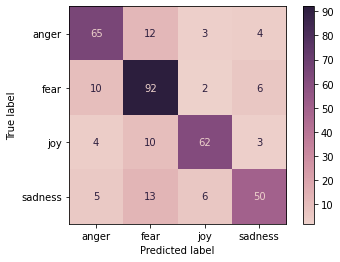

In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import plot_confusion_matrix

X_train = TDIDF_1000.transform(train_df['text'])
y_train = train_df['emotion']

X_test = TDIDF_1000.transform(test_df['text'])
y_test = test_df['emotion']

print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)
print('----------------------------')

MNB_model = MultinomialNB(alpha=0.01)
MNB_model = MNB_model.fit(X_train, y_train)

y_train_pred = MNB_model.predict(X_train)
y_test_pred = MNB_model.predict(X_test)

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))
print('----------------------------')
print(classification_report(y_true=y_test, y_pred=y_test_pred))
plot_confusion_matrix(MNB_model, X_test, y_test, cmap=sns.cubehelix_palette(as_cmap=True))

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

The Naive Bayes model seems to do better than the decision tree when it comes to accuracy, prediction, recall and f1-score.
Both models seem to achieve suspiciously high training accuracy (especially the Decision tree model) when compared to testing accuracy. This suggest overfit for both models, although much more severe on the Decision Tree.
While the proportion of correct predictions doesn't change much between the 2 models, we can see that in the Naive Bayes model there is a disproportionate number of false positives for the class 'fear', indicating that the model is over-predicting the most frequent class.
Decision trees are prone to overfitting, especially with a low number of examples (and high number of features) like ours. 
One possible solution to overfitting could be pruning the tree, or setting a maximum depth or a maximum number of leaves.
Additionally, we know that the frequency of a certain word can be a predictor to the frequency of another because of the varying probabililty of 2 given words appearing together. This means that our features are not independent, and decision trees don't handle correlated featues too well.

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

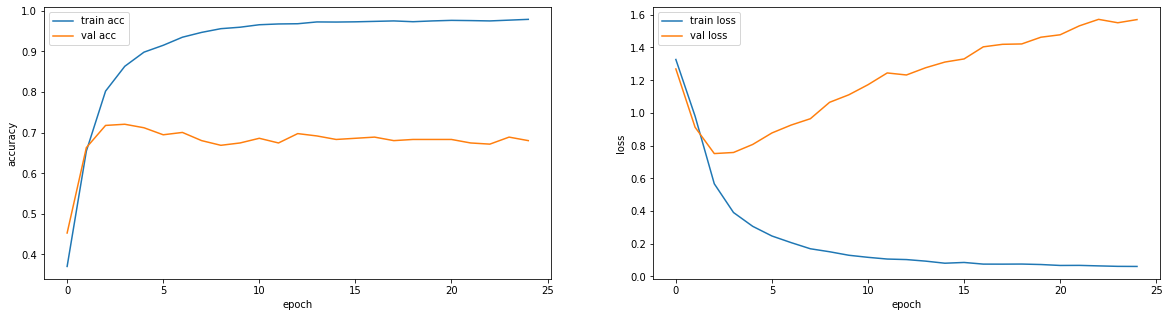

In [8]:
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(20, 5)

sns.lineplot(x=training_log.epoch, y=training_log.accuracy, ax=ax1, label='train acc')
sns.lineplot(x=training_log.epoch, y=training_log.val_accuracy, ax=ax1, label='val acc')
sns.lineplot(x=training_log.epoch, y=training_log.loss, ax=ax2, label='train loss')
sns.lineplot(x=training_log.epoch, y=training_log.val_loss, ax=ax2, label='val loss')
plt.legend()
plt.show()

The graphs above show the model improving during the 25 epochs of training - loss is decreasing and accuracy is increasing until it plateaus. However, we can see that both validation accuracy and loss closely follow their training counterparts for a few epochs but depart soon after, with accuracy being stable at around 0.7 and loss going from 0.8 to 1.6. This indicates that the model is failing to generalize over unseen data, in other words overfitting.

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?

In [9]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "data/GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

In [10]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577817916870117),
 ('thank', 0.9376667141914368),
 ('welcome', 0.9336150288581848),
 ('love', 0.9176183938980103),
 ('miss', 0.916450023651123),
 ('hello', 0.9158351421356201),
 ('thanks', 0.9150084257125854),
 ('merry', 0.9053248763084412),
 ('bless', 0.9027323126792908),
 ('wish', 0.9013165831565857)]

In [11]:
import numpy as np
def make_sentence_vector_google(row):
    n_words = 0
    sentence_vector = np.zeros(300)
    for word in row['unigrams']:
        try:
            sentence_vector  += w2v_google_model.get_vector(word)
            n_words += 1
        except KeyError:
            print(f'word {word} not found') 
    return sentence_vector / n_words

train_df['sentence_vector'] = train_df.apply(make_sentence_vector_google, axis=1)
test_df['sentence_vector'] = test_df.apply(make_sentence_vector_google, axis=1)
    
# Many words - especially emojis and named entities are not being found

word realDonaldTrump not found
word KellyannePolls not found
word ... not found
word Trump2016 not found
word yourefired not found
word MartyrsNotBeggars not found
word twlldun not found
word bbcquestiontime not found
word JacobReesMogg not found
word leicesterliz not found
word normanlamb not found
word CarolineLucas not found
word JuliaHB1 not found
word PeopleLikeMeBecause not found
word BigDaddyx47 not found
word MannyM83 not found
word DareToReagan not found
word Oregon/Baylor not found
word ashleynwinters not found
word ContentwiththeLordsPortion not found
word days. not found
word 90:14 not found
word 🔥Anger not found
word poured.🔥 not found
word \n\n~Mark not found
word 'failure not found
word 16K not found
word tiagotatamotors not found
word TataMotors not found
word raylewis not found
word theydontlikeyoueither not found
word unwoke not found
word 's not found
word bond/friendship not found
word WeirdWednesday not found
word jump-scared not found
word code-brown not found
wor

word lookd not found
word actorslife not found
word hardworkpaysoff not found
word 101 not found
word 😂😂😂😂😋 not found
word NativeApprops not found
word SBShear not found
word iscalming not found
word mysoul not found
word IndyMN not found
word TheNiceBot not found
word lee_family5 not found
word USAneedsTRUMP not found
word HillaryClinton not found
word realDonaldTrump not found
word campaignin not found
word TerenceCruther not found
word Ward\n not found
word morgannbroom not found
word ❤️❤️ not found
word WestHamUtd not found
word ~75 not found
word ~25 not found
word live.ly not found
word mrgummyking not found
word relaxationiskey not found
word \n\n not found
word nojustice not found
word surivivor not found
word NoMore not found
word BarclaysUK not found
word -Dalai not found
word OWNTV not found
word djddueces not found
word 12:30 not found
word WRYYYYYY not found
word FatedDancer not found
word ~together not found
word 'That not found
word you~ not found
word dapperlaughs not f

<ipython-input-11-fd7641f0f101>:11: RuntimeWarning: invalid value encountered in true_divide
  return sentence_vector / n_words


word bodyposi not found
word Whitegirlwednesday not found
word BB18 not found
word RoyEnglish not found
word 's not found
word bond/friendship not found
word rabpeel not found
word 's not found
word 😂😭 not found
word ChronAVT not found
word 'with not found
word ... not found
word well-informed not found
word 's not found
word hsm2 not found
word GordonReid91 not found
word 's not found
word andy_murray not found
word 's not found
word ’ not found
word iStoleFreeHugs not found
word stephlaris not found
word 20 not found
word cstonehoops not found
word 65/1 not found
word top10 not found
word hardyboys not found
word impactonpop not found
word BbeautifulSoul_ not found
word ... not found
word 😕 not found
word hangry not found
word day5 not found
word Zerfash not found
word — not found
word 's not found
word bbcfootball not found
word nationalcares not found
word haikuchallenge not found
word haiku\n\nThe not found
word air\nMy not found
word death\nNo not found
word 😋💦 not found
word Bla

word williamcontrol not found
word ... not found
word ... not found
word live.ly not found
word jaredhorgan not found
word Courteoussoul not found
word MattyMcDee not found
word 349 not found
word 20 not found
word 340 not found
word Melanie_Pierce not found
word HunterHayes not found
word 's not found
word 😊😍❤️ not found
word 's not found
word thevoice not found
word 342:147 not found
word neeze not found
word swear\nA not found
word there. not found
word -- not found
word \n not found
word AMNDBots not found
word live.ly not found
word elise_awsome_11 not found
word LPDonovan not found
word bull's-eye not found
word moM not found
word JoeFahezy not found
word 😂 not found
word yoosung not found
word Megannn_walsh12 not found
word itsshelleeey not found
word 's not found
word paulbushnell25 not found
word Dubai92 not found
word 's not found
word ... not found
word 😐 not found
word RegalisAzura not found
word \ngrasp not found
word 's not found
word .. not found
word lethargytyler not f

word Netflix_ME not found
word youtubegaming not found
word pencil✏ not found
word 's not found
word ⚫ not found
word 😞 not found
word .. not found
word .. not found
word 's not found
word \n\n not found
word Fly_Norwegian not found
word worstairline not found
word beyondajoke not found
word Fosu-Mensa not found
word 15 not found
word 's not found
word Northamptons not found
word MohammedSomaa01 not found
word T.roles not found
word davidpreece12 not found
word FitbaHacks not found
word 90 not found
word GreensACT not found
word ShaneRattenbury not found
word carolinelec not found
word publictransport not found
word CanberraAirport not found
word camilluddington not found
word ’ not found
word ’ not found
word -AW not found
word KevinI not found
word GGGBoxing not found
word SpecialKBrook not found
word 600k not found
word 450k not found
word BigLepley not found
word angela31694996 not found
word TheIndigoArrow not found
word 's not found
word CNNAshleigh not found
word ... not found
w

word selfie not found
word desication not found
word ASFCofficial not found
word northampton not found
word Fatumoriginal not found
word 's not found
word ManUp not found
word raylewis not found
word theydontlikeyoueither not found
word unwoke not found
word AnthonyWeiner not found
word GasCrisis2016 not found
word NoDAPL not found
word chocorobos not found
word .. not found
word warFarePower not found
word thomeagle not found
word centre not found
word DL_Hart not found
word DonnieDollars not found
word AaronBiggsPro not found
word WWENoWayJose not found
word cwfmidatlantic not found
word welfarereform not found
word 'model not found
word .. not found
word 😍🍂🌾🍁 not found
word 's not found
word RealBD_ not found
word ReyesAverie not found
word 47 not found
word 2015 not found
word BlairWitchMovie not found
word movie\n not found
word BlairWitch not found
word blairwitchproject not found
word HorrorMovies not found
word Hayles_101 not found
word 's not found
word TDsNation not found
wor

word 's not found
word 's not found
word 🙏🏽✌🏽️ not found
word Checked-in not found
word perpetualgeek not found
word littlebakaa not found
word AlcohoIPorn not found
word highs\nI not found
word live.ly not found
word thebrandonrobert not found
word StrongestBeing not found
word ←would not found
word 's not found
word was→ not found
word jwonder81 not found
word MacadamionNut not found
word course.Progress not found
word RosieBalls not found
word jadelalaa_ not found
word HillaryClinton not found
word sales.Sickening not found
word her🙈 not found
word alicemazzy not found
word -- not found
word 's not found
word -- not found
word TheLadyOfGlenco not found
word live.ly not found
word arbitraryvlog not found
word violation.\n\n not found
word TerranceCrutcher not found
word USAneedsTRUMP not found
word HillaryClinton not found
word realDonaldTrump not found
word blackeyed_susie not found
word hearts/minds not found
word JoyceCarolOates not found
word \nBreath not found
word danisnotonfir

word 2/2 not found
word “ not found
word ’ not found
word ” not found
word 😂😭 not found
word sidviyer not found
word FJHobson not found
word Beaker126 not found
word Biastai not found
word hotpatooties not found
word HillaryClinton not found
word TheDemocrats not found
word 's not found
word faithstrust not found
word TheeCurrentYear not found
word DailyJoshleen not found
word KA- not found
word 😭😂 not found
word BB18 not found
word CurtisJobling not found
word JamesWickham not found
word home-owning not found
word RyhenMessedUp not found
word 's not found
word 'daddy not found
word 😂 not found
word mediumpurple not found
word pickering not found
word ahahah not found
word Addiction\n\n not found
word habit\n\nTalk not found
word Joys\n\n not found
word behappy not found
word SlaveGuinevere not found
word it1 not found
word stackee not found
word 😂😂 not found
word LiamJamesVernon not found
word BossUpJaee not found
word code😴 not found
word 's not found
word Piggiewhopays not found
wor

word fatgirlhealthy not found
word MBSCBILL not found
word 25 not found
word 24 not found
word Casper10666 not found
word kapilsharmak9 not found
word baloch not found
word EmmyA2 not found
word snickerfritz04 not found
word Gahh not found
word ... not found
word 30 not found
word .. not found
word ... not found
word ... not found
word HunterDean_ not found
word airtelindia not found
word .. not found
word member🙄😂 not found
word reluctantnicko not found
word chickflick not found
word comethefuckonbridget not found
word HomeSwapperteam not found
word 's not found
word 1.5 not found
word late.1st not found
word 'Ma'am not found
word hateBeingLate not found
word 😩😪 not found
word CNNPolitics not found
word ... not found
word ... not found
word Yoshi_OnoChin not found
word fixthisgame not found
word sfvrefund not found
word nopanicattack not found
word ccrago not found
word Jonza not found
word dontbreathe not found
word WarrenTheaters not found
word icantholdmybreaththatlong not found
wo

In [12]:
def make_sentence_vector_twitter(row):
    n_words = 0
    sentence_vector = np.zeros(25)
    for word in row['unigrams']:
        try:
            sentence_vector  += glove_twitter_25_model.get_vector(word)
            n_words += 1
        except KeyError:
            print(f'word {word} not found') 
    return sentence_vector / n_words

train_df['sentence_vector_2'] = train_df.apply(make_sentence_vector_twitter, axis=1)
test_df['sentence_vector_2'] = test_df.apply(make_sentence_vector_twitter, axis=1)

# Same problem here

word realDonaldTrump not found
word KellyannePolls not found
word New not found
word ... not found
word I not found
word I not found
word Trump2016 not found
word yourefired not found
word We not found
word MartyrsNotBeggars not found
word twlldun not found
word bbcquestiontime not found
word JacobReesMogg not found
word leicesterliz not found
word normanlamb not found
word CarolineLucas not found
word JuliaHB1 not found
word Oh not found
word Brewer not found
word The not found
word PeopleLikeMeBecause not found
word I not found
word BigDaddyx47 not found
word I not found
word I not found
word 2 not found
word 3 not found
word MannyM83 not found
word DareToReagan not found
word I not found
word HATE not found
word I not found
word Oregon/Baylor not found
word I not found
word ashleynwinters not found
word I not found
word I not found
word ContentwiththeLordsPortion not found
word O not found
word Ps not found
word 90:14 not found
word I not found
word 🔥Anger not found
word poured.🔥 no

word 20 not found
word engiybhekayo not found
word yasezayoni not found
word Need not found
word .... not found
word .... not found
word Women not found
word great/we not found
word Police not found
word Officers not found
word .... not found
word NOT not found
word 'shoot not found
word It not found
word wrong.\n\n not found
word ORConservative not found
word MichaelaAngelaD not found
word It not found
word Be not found
word eachus not found
word At not found
word That not found
word BS-ing not found
word MrMalky not found
word kwr66 not found
word How not found
word Switched not found
word At not found
word Profit not found
word 5-20 not found
word 100-300 not found
word month.Do not found
word fxventury.com not found
word bear_ing not found
word ... not found
word -P not found
word laureeenwillam not found
word 😡😡 not found
word carysmithwriter not found
word Maria_Savva not found
word RealRockAndRoll not found
word We not found
word World not found
word My not found
word Jesus not 

<ipython-input-12-81f883ab87ea>:10: RuntimeWarning: invalid value encountered in true_divide
  return sentence_vector / n_words



word But not found
word I not found
word 😭 not found
word Beats not found
word fire-ea not found
word JoeGoodmanJr not found
word A not found
word But not found
word welfarereform not found
word 'model not found
word AllredMD not found
word KerryCallen not found
word thismanthispete not found
word Kirby not found
word Black not found
word Panther not found
word How not found
word Who not found
word ... not found
word I not found
word Are not found
word Wycelv not found
word Joey7Barton not found
word I not found
word Joey not found
word England not found
word .. not found
word .. not found
word Watch not found
word live.ly not found
word thebrandonrobert not found
word Candice not found
word 👊🏻🙄 not found
word And not found
word 😓 not found
word I not found
word 93.7 not found
word In not found
word AldiToHarrods not found
word I not found
word I not found
word LindseySanford not found
word simplymeasured not found
word Swear not found
word God not found
word 8 not found
word 6 not fo

word cburt43 not found
word marielleblaine8 not found
word princesskeilani not found
word I not found
word I not found
word I not found
word FitnessFirstAU not found
word 3 not found
word whypay not found
word Think not found
word I not found
word 😂😂😭😭 not found
word 😊😊😩😩 not found
word I not found
word Satan not found
word tamriiel not found
word I not found
word We not found
word Maine not found
word isthismike_p not found
word Late not found
word Feeling not found
word Candice not found
word This not found
word Jack not found
word Nicholson not found
word Joker not found
word GBBO not found
word Thought not found
word I not found
word GPA not found
word I not found
word I not found
word 😪 not found
word Asian not found
word Tiger not found
word Mosquitoes not found
word More not found
word I not found
word w/as not found
word I not found
word I not found
word .. not found
word I not found
word .. not found
word It not found
word I not found
word You not found
word Brendon not found


word saltmage not found
word I not found
word I not found
word FF not found
word ElizaNealsRocks not found
word Love not found
word Eliza not found
word Neals not found
word ROCKS not found
word 😎🎸 not found
word frolicsome not found
word If not found
word Some not found
word West not found
word Ham not found
word _Mrs_Peel not found
word lp_lisa not found
word PaulRGoulden not found
word LisaLuscious not found
word Might not found
word Recently not found
word firstdirect not found
word I not found
word DNA not found
word 😩😩😩 not found
word A not found
word Maybe not found
word I not found
word 😂😅 not found
word This not found
word Go not found
word Snowgang not found
word Amynicolehill12 not found
word Princess not found
word bodyposi not found
word Whitegirlwednesday not found
word Paul not found
word Paul not found
word Paul not found
word BB18 not found
word RoyEnglish not found
word Forever not found
word Molly not found
word bond/friendship not found
word rabpeel not found
word M

word I not found
word Wishing not found
word needsmoresleep not found
word SusannahSpot not found
word I not found
word dc_mma not found
word ChampionsFight not found
word Holly not found
word One not found
word Cyborg not found
word Hey not found
word Channel not found
word 4 not found
word GBBO not found
word A not found
word GEN not found
word OBC not found
word 100 not found
word .i not found
word PMOIndia not found
word Patti not found
word She not found
word We not found
word ... not found
word Your not found
word Normy not found
word Hate not found
word I not found
word 5 not found
word ajjaffe not found
word MattMurph24 not found
word nickspencer not found
word I not found
word NYC not found
word Did not found
word deBlasio not found
word Dylon not found
word He not found
word jennylhowe not found
word I not found
word eclecticbrotha not found
word Thanks not found
word It not found
word Breaking not found
word NM_NickNocturne not found
word Incentivise not found
word Internet 

word Can not found
word I not found
word Missing not found
word 500th not found
word India not found
word indvsnz not found
word 500thTest not found
word BCCI not found
word I not found
word ... not found
word ALONE not found
word 😓😰 not found
word When not found
word I not found
word despondency not found
word Sc.verses not found
word I not found
word Ex not found
word Lam not found
word 3:22-25 not found
word despondency not found
word Like not found
word ... not found
word Athenian not found
word When not found
word Laws not found
word Day not found
word 9 not found
word I not found
word I not found
word PTO not found
word I not found
word doneeeee not found
word But not found
word I not found
word Do not found
word Pakistan not found
word TerrorStatePak not found
word 1NatalieMaines not found
word Can not found
word TheDuranSite not found
word Russian not found
word U.S not found
word Lrihendry not found
word I not found
word USA not found
word Israel not found
word You not found
w

word Let not found
word firstleeds not found
word LeKingCoq not found
word MistaAggy not found
word GiovanniiDC not found
word The not found
word PeanutRD not found
word MelissaJoyRD not found
word SarahKoszykRD not found
word eat4performance not found
word rustnutrition not found
word jenhaugen not found
word I not found
word 4 not found
word VodafoneUKhelp not found
word VodafoneUK not found
word My not found
word £44.77 not found
word £148 not found
word Watch not found
word live.ly not found
word paulzimmer not found
word Why not found
word iPhones not found
word iPhones not found
word Can not found
word Congress not found
word EpiPen not found
word Oh not found
word I not found
word 'get not found
word 'be not found
word Do not found
word I not found
word You not found
word Olajide_Shutti not found
word It not found
word Now not found
word India not found
word Singaholic121 not found
word Good not found
word Happy not found
word Let not found
word autumnmemories not found
word ann

word It not found
word First not found
word 😳😳 not found
word Just not found
word 💔 not found
word 😢 not found
word I not found
word Kid not found
word Cudi not found
word Travis not found
word Scott not found
word ... not found
word Dubai92 not found
word McDonalds not found
word Swear not found
word You not found
word You not found
word Wtf not found
word ExaltedCaptain not found
word She not found
word You not found
word janhopis not found
word I not found
word Bojack not found
word Then not found
word I not found
word LFC not found
word What not found
word lemonlover666 not found
word 'shit not found
word 🌝🌚 not found
word Did not found
word I not found
word Get not found
word Coventry not found
word BANG not found
word Gordon not found
word Brown not found
word If not found
word his/her not found
word V_of_Europe not found
word ckolacia not found
word MSM not found
word DT not found
word GOP not found
word 4 not found
word We not found
word Are not found
word Source not found
word

word If not found
word I not found
word I not found
word Sherlock not found
word Holmes not found
word CorningFootball not found
word IT not found
word 'S not found
word GAME not found
word DAY not found
word T not found
word MINUS not found
word 14:30 not found
word TheZantarin not found
word Then not found
word White not found
word aidanparr not found
word No not found
word It not found
word Twitter not found
word BBHOH not found
word Paul not found
word ChildrenOfMen.\n\n not found
word Dear not found
word HSSU not found
word I not found
word MichaelSalfino not found
word It not found
word Fear not found
word The not found
word Walking not found
word Dead not found
word That not found
word When not found
word Need not found
word biggerthanyuu not found
word He not found
word He not found
word tightly.+ not found
word World not found
word Where not found
word Terrorist not found
word Who not found
word Which not found
word 3:45am not found
word Elouise not found
word Labour not found

word ... not found
word CBCNews not found
word Canada not found
word Sharia not found
word Islam not found
word HeyCaraJay not found
word I not found
word GIF not found
word Anytime not found
word perezed not found
word BBTN not found
word marblesinmouth not found
word I not found
word The not found
word 98 not found
word wptmain not found
word officialShaky not found
word 'Operation not found
word Echoes not found
word ... not found
word MarGraham not found
word I not found
word Safe not found
word Just not found
word I not found
word NinjaWorrier not found
word ali_zimmer not found
word m_pattison not found
word How not found
word I not found
word Fake not found
word Ugh not found
word I not found
word I not found
word 10 not found
word Literally not found
word windows10 not found
word laura221b not found
word I not found
word 😂 not found
word My not found
word 😷 not found
word Your not found
word VivaLaSergio not found
word Jorge not found
word He not found
word 90dayfiance not foun

word LeBatardShow not found
word Race not found
word 2016 not found
word Followback not found
word Quote_Soup not found
word Be not found
word The not found
word Sorrow not found
word I not found
word I not found
word RIP not found
word MGS3 not found
word It not found
word I not found
word I not found
word Im not found
word Im not found
word GoingCrazy not found
word HelpMe not found
word Insane not found
word Antisocial not found
word Appropriate not found
word Pakistan not found
word Like not found
word 'renunciation not found
word Trump not found
word Hillary not found
word PresidentialDebate not found
word PresidentialElection2016 not found
word orangehitler not found
word Going not found
word StephenKing not found
word CUJO not found
word I not found
word rantking not found
word Wild_Lucario_ not found
word I not found
word When not found
word EE not found
word I not found
word I not found
word Spain not found
word I not found
word Ca not found
word Ninja not found
word OSU not f

word ATLtraffic not found
word A not found
word Osama not found
word Bin not found
word Laden not found
word Pakistan not found
word BanKimoon_amdg not found
word UKLittleKitchen not found
word Defo not found
word Nice not found
word Autumn not found
word GlobeChadFinn not found
word Sadly not found
word The not found
word Transitioning not found
word Thanks not found
word LifeTeen not found
word ❤️ not found
word TheMandyMoore not found
word You not found
word Your not found
word ... not found
word I not found
word ThisIsUs not found
word 🤗 not found
word GADOT not found
word Williams not found
word Ivan not found
word Allen not found
word Jr not found
word Blvd not found
word This not found
word ATLtraffic not found
word wesrucker247 not found
word .... not found
word My not found
word I not found
word 'wardrobe not found
word itsyourgirl_Z not found
word Toronto not found
word A not found
word Absolutely not found
word CAS not found
word DinoHyogi not found
word Hakyeon not found
wo

word WorldSBK not found
word Moto not found
word GP not found
word msfang not found
word I not found
word I not found
word Yo not found
word Yo not found
word Yo not found
word DarthVader not found
word \nI not found
word I not found
word I not found
word DrSRSheikh not found
word And not found
word \n not found
word BanoBee not found
word AK_Forty7 not found
word In not found
word I not found
word ... not found
word Witout not found
word dcexaminer not found
word Democrats not found
word They not found
word When not found
word 🙄😂 not found
word Now not found
word I not found
word ... not found
word I not found
word God not found
word mommaGrendel not found
word Watch not found
word live.ly not found
word izzybuzy365 not found
word ggreenwald not found
word SusanSarandon not found
word We not found
word 5 not found
word World not found
word You not found
word He not found
word beautiful\nShe not found
word bf\n\nSame not found
word \n\n not found
word India not found
word terrorist\n n

word I not found
word realDonaldTrump not found
word Gloriosa not found
word Bazigaga not found
word Rwanda not found
word I not found
word 15 not found
word BLUES not found
word BOB not found
word HADDRELL not found
word Guests\nFri not found
word 23rd not found
word Sep not found
word 8:30pm not found
word 11:00pm not found
word TunbridgeWells not found
word When not found
word Internet not found
word If not found
word The not found
word CreateLove not found
word ☺️ not found
word CBSThisMorning not found
word newsgirl123456 not found
word DOES not found
word N'T not found
word September not found
word 20 not found
word 2016 not found
word 18:41 not found
word EDT not found
word TRUMP not found
word FAIL not found
word LondonMidland not found
word 14:49 not found
word Birmingham not found
word Hereford not found
word Friday not found
word The not found
word No not found
word Craig not found
word Gordon not found
word harowe not found
word keithboykin not found
word ... not found
word

word \n not found
word bcwinechat not found
word That not found
word 700 not found
word It not found
word I not found
word 'Grande not found
word 130 not found
word Forgot not found
word I not found
word Thinking not found
word Always not found
word Time not found
word hopefullyfunny not found
word LOL not found
word Get not found
word inthedark not found
word I not found
word Miami not found
word If not found
word flyfrontier not found
word FrontierCare not found
word I not found
word knology not found
word w/equipment not found
word CBSBigBrother not found
word Meech not found
word Bridgette not found
word Crying not found
word Ugh not found
word Bridgette not found
word Seeing not found
word Magicalllll not found
word It not found
word What not found
word Zak_Atif not found
word USA not found
word Pak not found
word 1n not found
word 12 not found
word rsiereilly not found
word Markgatiss not found
word I not found
word Trump not found
word You not found
word JedRivett not found
word

word Darren_Hammer not found
word Been not found
word Charlotte not found
word I not found
word Violence not found
word 🙏🏽✌🏽️ not found
word Checked-in not found
word Toronto not found
word Took not found
word 3D not found
word perpetualgeek not found
word littlebakaa not found
word AlcohoIPorn not found
word I not found
word highs\nI not found
word Watch not found
word live.ly not found
word thebrandonrobert not found
word StrongestBeing not found
word ←would not found
word Wukong not found
word was→ not found
word jwonder81 not found
word MacadamionNut not found
word course.Progress not found
word The not found
word RosieBalls not found
word I not found
word Good not found
word Twitter not found
word Wish not found
word jadelalaa_ not found
word NRA not found
word HillaryClinton not found
word She not found
word I not found
word sales.Sickening not found
word My not found
word Omg not found
word her🙈 not found
word alicemazzy not found
word Chait not found
word For not found
word Thi

word \n'You not found
word empty-headed not found
word \n'You not found
word Love not found
word I not found
word mehnazt not found
word Mel_Harder not found
word I not found
word Come not found
word Controlling not found
word Paradise not found
word Quran not found
word Surah not found
word Al not found
word Imran not found
word 133-134 not found
word goodDeed not found
word Smile not found
word I not found
word surprisepeople not found
word influenceinternational not found
word BattleSmitten not found
word \n\nother not found
word 'story not found
word It not found
word I not found
word cooties.\nI not found
word I not found
word sleepissues not found
word VanDashNessa not found
word taotao_salupa5 not found
word Nobody not found
word The not found
word Clayton not found
word Homes not found
word WatcherDev not found
word WarcraftDevs not found
word ... not found
word 1 not found
word Thanks not found
word MalYoung not found
word AngelicaMcD not found
word I not found
word Stitch not

word I not found
word Steve not found
word Irwin not found
word When not found
word 'My not found
word Italy not found
word IrishTimesPol not found
word IrishTimes not found
word Irish not found
word 2016 not found
word PatriotsInform not found
word I not found
word Brissett not found
word He not found
word I not found
word Tonight not found
word DragRace not found
word AllStars2 not found
word GAVE not found
word ME not found
word LIFE not found
word Yaassss not found
word teamalaska not found
word teamkatya not found
word Follow4Follow not found
word Nierstein not found
word Watch not found
word live.ly not found
word its.finfin not found
word DSWT not found
word I not found
word It not found
word How not found
word SouthAfrica not found
word WorldRhinoDay not found
word AmyMek not found
word I not found
word I not found
word Alanafergusson not found
word When not found
word KeithLamontScott not found
word Do not found
word I not found
word Next not found
word lowmood not found
word 

word GRIPLIKEAVICE_ not found
word I not found
word I not found
word Puts not found
word Gronnhair not found
word buryprofs not found
word DittoBistro not found
word Cheese not found
word Rooney not found
word PhilGlutting not found
word Hey not found
word There not found
word Phil not found
word Glutting not found
word TrevorHMoore not found
word paget_old not found
word In not found
word Scotland not found
word anti-nationalists not found
word Socialists not found
word trashcami not found
word Realest not found
word I not found
word We not found
word light. not found
word –Plato not found
word The not found
word 😬😆 not found
word thefriendtest not found
word If not found
word 7 not found
word wifl not found
word The not found
word Ring not found
word Rooney not found
word 5 not found
word League not found
word Cup not found
word Northampton not found
word Town not found
word Let not found
word MUFC not found
word If not found
word I not found
word I not found
word KygoMusic not found

training accuracy: 0.79
testing accuracy: 0.72
----------------------------
              precision    recall  f1-score   support

       anger       0.71      0.63      0.67        84
        fear       0.74      0.79      0.77       110
         joy       0.70      0.80      0.75        79
     sadness       0.71      0.62      0.66        74

    accuracy                           0.72       347
   macro avg       0.71      0.71      0.71       347
weighted avg       0.72      0.72      0.72       347



/Users/manu/data_mining/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


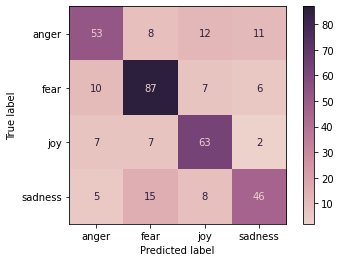

In [13]:
from sklearn.linear_model import LogisticRegression

X_train = train_df['sentence_vector'].apply(pd.Series).fillna(0)
y_train = train_df['emotion']

X_test = test_df['sentence_vector'].apply(pd.Series).fillna(0)
y_test = test_df['emotion']

google_LR_model = LogisticRegression()
google_LR_model = google_LR_model.fit(X_train, y_train)

y_train_pred = google_LR_model.predict(X_train)
y_test_pred = google_LR_model.predict(X_test)

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))
print('----------------------------')
print(classification_report(y_true=y_test, y_pred=y_test_pred))
plot_confusion_matrix(google_LR_model, X_test, y_test, cmap=sns.cubehelix_palette(as_cmap=True))

training accuracy: 0.47
testing accuracy: 0.46
----------------------------
              precision    recall  f1-score   support

       anger       0.43      0.37      0.40        84
        fear       0.46      0.61      0.52       110
         joy       0.56      0.62      0.59        79
     sadness       0.34      0.19      0.24        74

    accuracy                           0.46       347
   macro avg       0.45      0.45      0.44       347
weighted avg       0.45      0.46      0.45       347



/Users/manu/data_mining/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


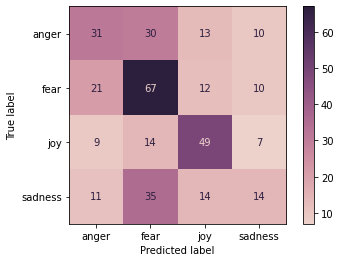

In [24]:
X_train = train_df['sentence_vector_2'].apply(pd.Series).fillna(0)
y_train = train_df['emotion']

X_test = test_df['sentence_vector_2'].apply(pd.Series).fillna(0)
y_test = test_df['emotion']

twitter_LR_model = LogisticRegression()
twitter_LR_model = twitter_LR_model.fit(X_train, y_train)

y_train_pred = twitter_LR_model.predict(X_train)
y_test_pred = twitter_LR_model.predict(X_test)

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))
print('----------------------------')
print(classification_report(y_true=y_test, y_pred=y_test_pred))
plot_confusion_matrix(twitter_LR_model, X_test, y_test, cmap=sns.cubehelix_palette(as_cmap=True))

The google model does a lot better than the twitter one, probably because of the different dimensionality; averaging the word vectors will lead to information loss, and the negative effect is more pronounced with few dimensions.

In [15]:
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

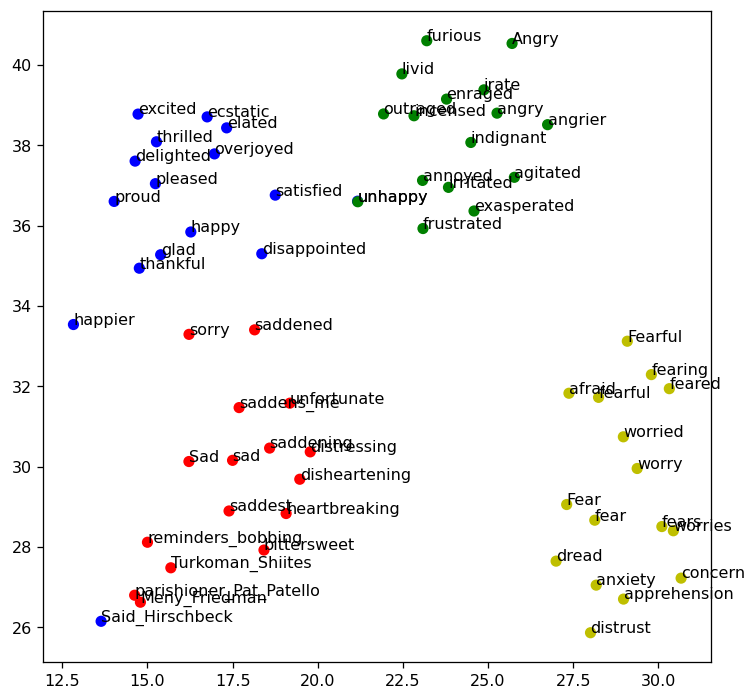

In [22]:
%matplotlib inline
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 700
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

After trying different values for 'size', I found that 700 achives a good result. There is an outlier "Said_Hirschbeck" (?), which for other values of 'size' ends up much closer to the 'sad' cluster than to the 'happy' one.